In [ ]:
!wget http://cb.lk/covid_19

--2022-08-24 05:00:32--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-08-24 05:00:32--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-08-24 05:00:32--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
TRAIN_PATH = 'CovidDataset/Train'
val_PATH = 'CovidDataset/Val'

In [ ]:
train_datagen = image.ImageDataGenerator(rescale= 1/255,zoom_range = 0.2,horizontal_flip=True)
train_data = train_datagen.flow_from_directory(directory='/content/CovidDataset/Train',target_size = (256,256),batch_size=16 , class_mode='binary')

Found 224 images belonging to 2 classes.


In [ ]:
val_datagen = image.ImageDataGenerator(rescale= 1/255)
val_data = val_datagen.flow_from_directory(directory='/content/CovidDataset/Val',target_size = (256,256),batch_size=16 , class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (256,256,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))






In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
r = model.fit_generator(train_data,steps_per_epoch=8,epochs = 10 ,validation_data=val_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
8/8 [==============================] - 22s 968ms/step - loss: 2.9319 - accuracy: 0.4141 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 7s 860ms/step - loss: 0.6986 - accuracy: 0.4609 - val_loss: 0.6922 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 7s 929ms/step - loss: 0.6736 - accuracy: 0.6797 - val_loss: 0.6730 - val_accuracy: 0.8333
Epoch 4/10
8/8 [==============================] - 7s 944ms/step - loss: 0.5941 - accuracy: 0.6719 - val_loss: 0.5368 - val_accuracy: 0.8333
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.4577 - accuracy: 0.7500 - val_loss: 0.4760 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 7s 890ms/step - loss: 0.4688 - accuracy: 0.8125 - val_loss: 0.3376 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 7s 931ms/step - loss: 0.3276 - accuracy: 0.8281 - val_loss: 0.2643 - val_accuracy: 0.9833
Epoch 8/10
8/8 [======

In [ ]:
model.save('model_adv.h5')

In [ ]:
model.evaluate_generator(train_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.1651492565870285, 0.9464285969734192]

In [ ]:
model.evaluate_generator(val_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.08215948939323425, 0.9833333492279053]

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test  = []


In [ ]:
from PIL import Image
for i in os.listdir("CovidDataset/Val/Normal"):
  img = image.load_img('CovidDataset/Val/Normal/'+i,target_size= (256,256))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis =0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)


In [28]:
from PIL import Image
for i in os.listdir("CovidDataset/Val/Covid"):
  img = image.load_img('CovidDataset/Val/Covid/'+i,target_size= (256,256))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis =0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

AttributeError: ignored

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test).tolist()

In [ ]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

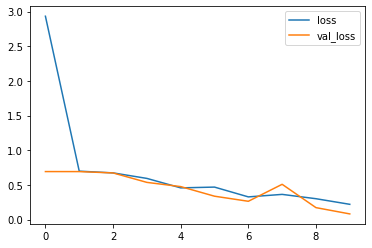

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

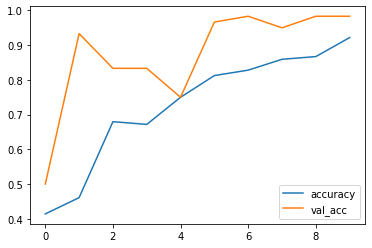

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

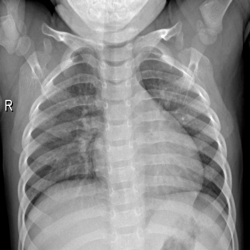

Radiologist : COVID-19  -ve
CNN Model:COVID-19  -ve 


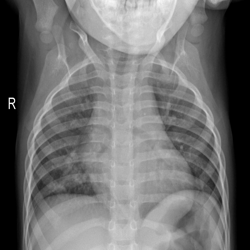

Radiologist : COVID-19  -ve
CNN Model:COVID-19  -ve 


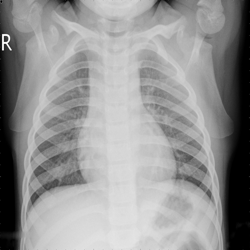

Radiologist : COVID-19  -ve
CNN Model:COVID-19  -ve 


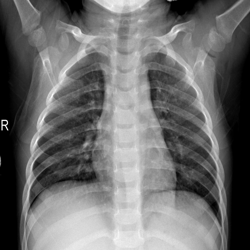

Radiologist : COVID-19  -ve
CNN Model:COVID-19  -ve 


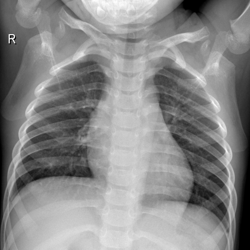

Radiologist : COVID-19  -ve
CNN Model:COVID-19  -ve 


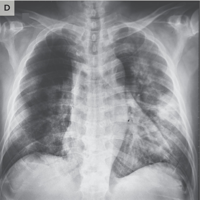

Radiologist : COVID-19  +ve
Radiologist : COVID-19  -ve


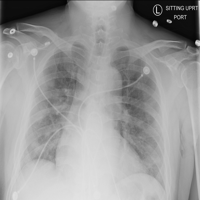

Radiologist : COVID-19  +ve
Radiologist : COVID-19  -ve


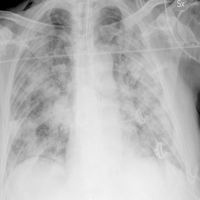

Radiologist : COVID-19  +ve
Radiologist : COVID-19  -ve


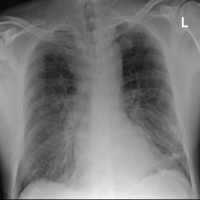

Radiologist : COVID-19  +ve
Radiologist : COVID-19  -ve


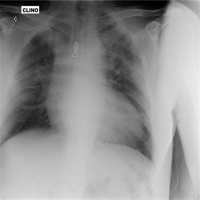

Radiologist : COVID-19  +ve
Radiologist : COVID-19  -ve


In [ ]:
class color:
  GREEN = '\033[92m'
  RED   = '\033[91m'

from  PIL import Image
j = 0
for i in os.listdir("CovidDataset/Val/Normal/"):
  j =j+1
  pil_img = Image.open("CovidDataset/Val/Normal/"+i)
  im = pil_img
  size = (250,250)

  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img('CovidDataset/Val/Normal/'+i,target_size= (256,256))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis =0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist : COVID-19  -ve' + color.GREEN)

  if p == 0:
    print(color.RED + 'Radiologist : COVID-19  +ve' + color.RED)
  else:
    print('CNN Model:COVID-19  -ve ')
  if (j==5):
    break


from  PIL import Image
j = 0
for i in os.listdir("CovidDataset/Val/Covid/"):
  j =j+1
  pil_img = Image.open("CovidDataset/Val/Covid/"+i)
  im = pil_img
  size = (200,200)

  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img('CovidDataset/Val/Covid/'+i,target_size= (256,256))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis =0)
  p = model.predict(img)
  print(color.RED + 'Radiologist : COVID-19  +ve' + color.RED)

  if p == 0:
    print(color.GREEN + 'Radiologist : COVID-19  -ve' + color.GREEN)
  else:
    print(color.GREEN + 'Radiologist : COVID-19  -ve' + color.GREEN)
  if (j==5):
    break